In [120]:
import folium as fl
import pandas as pd
from folium.plugins import MarkerCluster
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import codecs
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn

%matplotlib inline

In [140]:
def popup_html(html_file,width=400, height=300):

    f=codecs.open(html_file, 'r')
    html = f.read()
    iframe = fl.IFrame(html=html,width=width,height=height)
    popup = fl.Popup(iframe,max_width=width,width=width, height_policy='fixed')
    return popup

In [2]:
points = gpd.GeoDataFrame.from_file('inputs/puntos_AMV_v3.shp')
len(points)

10000

In [13]:
N_emp = 500
empleados = points[0:N_emp]
medios = ["caminando", "bicicleta", "bus", "metro", "moto", "taxi"]
empleados.loc[:,"medio transporte"] = [medios[i] for i in np.random.randint(0,6,N_emp)]
empleados.loc[:,"Nombre"] = ["empleado "+str(i) for i in range(1,N_emp+1)]
empleados

/home/camilo/anaconda3/envs/py3_gpd/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/camilo/anaconda3/envs/py3_gpd/lib/python3.6/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,id,geometry,medio transporte,Nombre
0,0,POINT (-75.5833696488325 6.177219334025713),taxi,empleado 1
1,1,POINT (-75.55080820563946 6.251171924425592),bus,empleado 2
2,2,POINT (-75.61160750599913 6.273596092474934),moto,empleado 3
3,3,POINT (-75.55791134823994 6.215678006017739),taxi,empleado 4
4,4,POINT (-75.55718446905307 6.353162897396272),bicicleta,empleado 5
5,5,POINT (-75.59664585920089 6.293408526444376),taxi,empleado 6
6,6,POINT (-75.65466572640047 6.181677149320697),moto,empleado 7
7,7,POINT (-75.60183662509709 6.223344984743212),bicicleta,empleado 8
8,8,POINT (-75.58598557151855 6.186171440065421),caminando,empleado 9
9,9,POINT (-75.61096854623882 6.230614572961287),bus,empleado 10


In [14]:
empresa = points[9998:9999]
geom_empresa=empresa.geometry.values[0]
nombres_buffers=["buffer de "+str(i)+"km" for i in [20,10,5,1]]
buffers = [geom_empresa.buffer(i/(1.11*(10**2))) for i in [20,10,5,1]]
empresa_b = gpd.GeoDataFrame(nombres_buffers,columns = ["Buffer"] , geometry=buffers)
empresa_b.loc[:, "empleados"] = [len(empleados[empleados.geometry.within(buffers[i])]) for i in range(4)]
empresa_b

#20000/1.11*(10**5) --> 20km
#20/1.11*(10**2) --> 20km

# empresa.geometry.values[0].buffer()

,Buffer,geometry,empleados
0,buffer de 20km,POLYGON ((-75.37243581224726 6.276135172930629...,483
1,buffer de 10km,POLYGON ((-75.46252590233736 6.276135172930629...,333
2,buffer de 5km,"POLYGON ((-75.5075709473824 6.276135172930629,...",139
3,buffer de 1km,POLYGON ((-75.54360698341844 6.276135172930629...,12


In [15]:
i = 3
n_within = len(empleados[empleados.geometry.within(empresa_b.geometry.values[i])])
print("numero de empleados con este buffer: "+str(n_within)+" de "+str(N_emp))
#empleados.geometry.intersection(empresa_b.geometry.values[i]).plot()
empleados[empleados.geometry.within(empresa_b.geometry.values[i])][["Nombre", "medio transporte"]]

numero de empleados con este buffer: 12 de 500


,Nombre,medio transporte
45,empleado 46,caminando
79,empleado 80,metro
109,empleado 110,caminando
127,empleado 128,caminando
133,empleado 134,bus
178,empleado 179,bus
252,empleado 253,bus
253,empleado 254,moto
264,empleado 265,moto
284,empleado 285,metro


In [16]:
trans_pub = gpd.GeoDataFrame.from_file('inputs/transporte_publico/transporte_publico.gpkg')
trans_pub

,OBJECTID,TIPO_SISTE,LINEA,NOMBRE_TRA,NOMBRE,ESTADO,SHAPELEN,geometry
0,187,METRO,Línea B,San Antonio - San Javier,San Antonio - San Javier,Existente,5507.218632,(LINESTRING (-75.56971470311153 6.247184292101...
1,188,METROPLUS,Línea 1,U. de M.- Av. Ferrocarril - Parque Aranjuez,U. de M. - Av. Ferrocarril - Parque Aranjuez -...,Existente,13431.110517,(LINESTRING (-75.60975696210016 6.230996774531...
2,138,METROPLUS,Línea 2,U. de M.- Av. Oriental - Parque Aranjuez,U. de M. - Av. Oriental - Parque Aranjuez - Av...,Existente,4997.798402,(LINESTRING (-75.56976691658866 6.229561685874...
3,96,METROCABLE,Línea J,San Javier - La Aurora,San Javier - La Aurora,Existente,2701.654122,(LINESTRING (-75.61340959417865 6.256642974416...
4,97,METROCABLE,Línea L,Santo Domingo - Arví,Santo Domingo - Arví,Existente,4682.115330,(LINESTRING (-75.50114205089682 6.281308308188...
5,98,METRO,Línea A,Niquía - La Estrella,Niquía - La Estrella,Existente,25140.783390,(LINESTRING (-75.62530484697821 6.153359669368...
6,95,METROCABLE,Línea K,Corredor Acevedo - Santo Domingo,Calle 107,Existente,1865.858758,(LINESTRING (-75.5572787366125 6.2996490081021...
7,117,METROCABLE,Sin definir,Cable La Aldea - El Morrón,Palmitas,Existente,1906.325910,(LINESTRING (-75.71606214096606 6.340641054182...
8,119,METRO,Línea C,San Javier - Niquía,San Javier - Niquía,Existente,2788.121922,(LINESTRING (-75.57042778882551 6.273898655806...


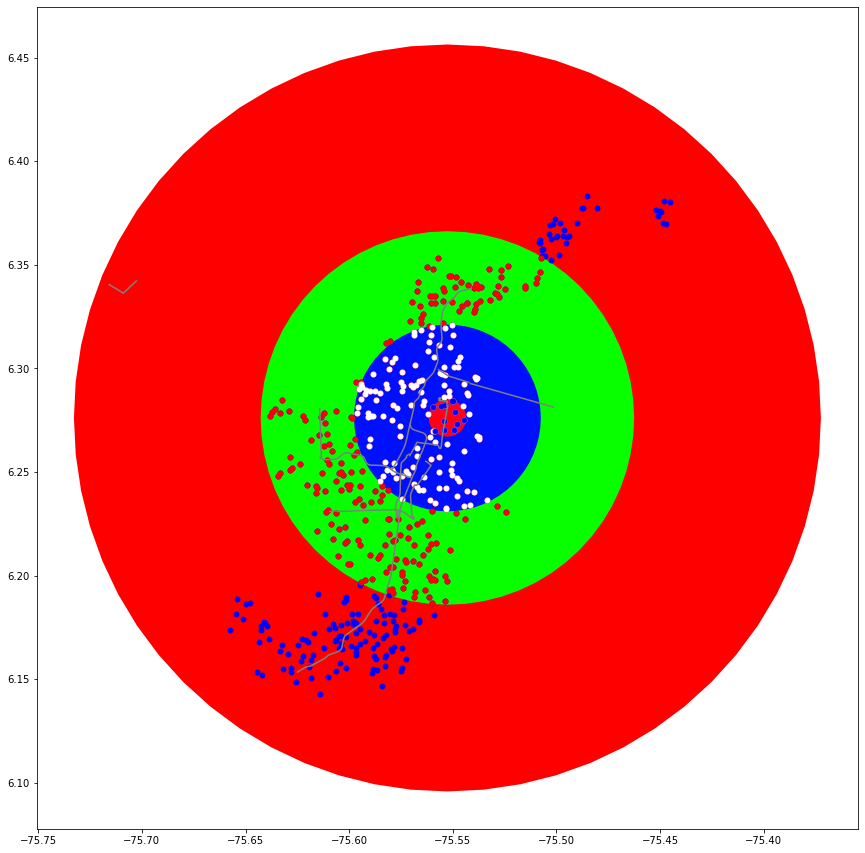

In [17]:

fig, ax = plt.subplots(figsize=(12,12))
#i = 3
#empresa_b[i:i+1].plot(ax=ax, markersize=24, color="blue")#['red', 'green', 'blue', "blue"])
hsv = plt.cm.get_cmap('hsv')

empresa_b.plot(ax=ax, markersize=24, cmap = 'hsv')#['red', 'green', 'blue', "red"], alpha = 0.6)
empresa.plot(ax=ax, markersize=24, color='red')
#empleados.plot(ax=ax, markersize=24, color='green')
#empleados[empleados.geometry.within(empresa_b.geometry.values[i])].plot(ax=ax, markersize=24, color='black')
trans_pub.plot(ax=ax, color='gray')
colors = ['blue', 'red', 'white', "blue"]
for i in range(4):
    empleados.geometry.intersection(empresa_b.geometry.values[i]).plot(ax=ax, markersize=24, color=colors[i])
plt.tight_layout()

In [34]:
color_list = ["purple", "red", "yellow", "green"]


In [453]:
styles_buffers = {"0":style_function_buffer_0, "1":style_function_buffer_1, "2":style_function_buffer_2, "3":style_function_buffer_3}

In [124]:
popups_buffers = {"0":popup_html('table_buffer_0.html',320, 620), "1":popup_html('table_buffer_1.html',400, 620), "2":popup_html('table_buffer_2.html',400, 620), "3":popup_html('table_buffer_3.html',400, 420)}

In [125]:
empresa.geometry.values[0].coords[0][1]

6.276135172930629

In [141]:
buffers_map = fl.Map(location=[ 6.26,-75.55], zoom_start=12,min_zoom = 8)

mc = MarkerCluster(name="Empleados")  #creating a Marker for each point in df_sample. Each point will get a popup with their zip

for row in empleados[:5].itertuples():
    mc.add_child(fl.Marker(
        location=[row.geometry.coords[0][1],  row.geometry.coords[0][0]], 
        #icon =fl.features.CustomIcon(icon_image="iconos_custom/icono_camina_ve.png" , icon_size=(5,5)),
        #icon=folium.Icon(color='lightgray', icon='user', prefix='fa'),
        popup=fl.Popup("Nombre")
        )
    )
    
fl.Marker([empresa.geometry.values[0].coords[0][1],empresa.geometry.values[0].coords[0][0]], 
          popup=popup_html('bokeh.html', width=1000),icon=fl.Icon(color='red',icon='industry')).add_to(buffers_map)

#Transport    
#fl.GeoJson(data=trans_pub, style_function=style_function, name = "Transporte Público", 
#               tooltip=fl.GeoJsonTooltip(fields=['LINEA', 'TIPO_SISTE', 'NOMBRE_TRA'],
#                                             aliases=['Linea Metro: ', 'Sistema: ','Nombre: '])
#              ).add_child(get_frame(400, 300)).add_to(buffers_map)
#Buffers
#
#    fl.GeoJson(data=empresa_b[i:i+1].to_json(), style_function=styles_buffers[str(i)], , 
#               tooltip=fl.GeoJsonTooltip(fields=['Buffer', 'empleados'],
#                                             aliases=['Buffer: ', '# de empleados: '])
#              ).add_child(popups_buffers[str(i)]).add_to(buffers_map)

radius_list = [20, 10,5,1]  
for i in range(4):
    fl.Circle([empresa.geometry.values[0].coords[0][1],empresa.geometry.values[0].coords[0][0]],
              radius=radius_list[i]*1000, color=color_list[i], weight= 10, 
              name = "Impedancia "+str(radius_list[i])+"km", 
              #tooltip=fl.GeoJsonTooltip(fields=['Buffer', 'empleados'],aliases=['Buffer: ', '# de empleados: '])
                   ).add_child(popups_buffers[str(i)]).add_to(buffers_map)
#          ).add_child(fl.Popup(empleados[empleados.geometry.within(empresa_b.geometry.values[i])][["Nombre", "medio transporte"]].to_html(
#    classes="table-striped table-hover condensed table-responsive",index=False),
#                               max_height=300, max_width=200)).add_to(buffers_map)


buffers_map.add_child(mc)
fl.map.LayerControl(collapsed=False).add_to(buffers_map)
buffers_map.save('impedancia.html')

In [314]:
help(fl.Popup)

Help on class Popup in module folium.map:

class Popup(branca.element.Element)
 |  Create a Popup instance that can be linked to a Layer.
 |  
 |  Parameters
 |  ----------
 |  html: string or Element
 |      Content of the Popup.
 |  parse_html: bool, default False
 |      True if the popup is a template that needs to the rendered first.
 |  max_width: int for pixels or text for percentages, default '100%'
 |      The maximal width of the popup.
 |  show: bool, default False
 |      True renders the popup open on page load.
 |  sticky: bool, default False
 |      True prevents map and other popup clicks from closing.
 |  
 |  Method resolution order:
 |      Popup
 |      branca.element.Element
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, html=None, parse_html=False, max_width='100%', show=False, sticky=False, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  render(self, **kwargs)
 |      Renders the HTML repre

In [340]:
help(fl.IFrame)

Help on class IFrame in module branca.element:

class IFrame(Element)
 |  Create a Figure object, to plot things into it.
 |  
 |  Parameters
 |  ----------
 |  html : str, default None
 |      Eventual HTML code that you want to put in the frame.
 |  width : str, default "100%"
 |      The width of the Figure.
 |      It may be a percentage or pixel value (like "300px").
 |  height : str, default None
 |      The height of the Figure.
 |      It may be a percentage or a pixel value (like "300px").
 |  ratio : str, default "60%"
 |      A percentage defining the aspect ratio of the Figure.
 |      It will be ignored if height is not None.
 |  figsize : tuple of two int, default None
 |      If you're a matplotlib addict, you can overwrite width and
 |      height. Values will be converted into pixels in using 60 dpi.
 |      For example figsize=(10, 5) will result in
 |      width="600px", height="300px".
 |  
 |  Method resolution order:
 |      IFrame
 |      Element
 |      builtins

In [452]:
def style_function_buffer_0(feature):
    return {
        'fillOpacity': 0,
        'weight': 10,
        'color': "purple"#transparent:'color': '#00000000'
    }
def style_function_buffer_1(feature):
    return {
        'fillOpacity': 0,
        'weight': 10,
        'color': "red"#transparent:'color': '#00000000'
    }
def style_function_buffer_2(feature):
    return {
        'fillOpacity': 0,
        'weight': 10,
        'color': "yellow"#transparent:'color': '#00000000'
    }
def style_function_buffer_3(feature):
    return {
        'fillOpacity': 0,
        'weight': 10,
        'color': "green"#transparent:'color': '#00000000'
    }


In [117]:
import codecs
f=codecs.open("bokeh.html", 'r')
html = f.read()
#print(html)#, file="try.txt")

In [119]:
width,height=(400, 300)
iframe = fl.IFrame(html=html,width=width,height=height)
popup = fl.Popup(iframe,max_width=width+200,width=width, height_policy="scale_width" )

In [118]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.

